# Importing all the necessary packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Data Processing

## Loading data

In [4]:
uncleaned_train_data = pd.read_csv('./titanic/train.csv')
uncleaned_test_data = pd.read_csv('./titanic/test.csv')

uncleaned_train_data.shape, uncleaned_test_data.shape

((891, 12), (418, 11))

In [5]:
uncleaned_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
# selecting features to be dropped
features_drop = ["PassengerId", "Name", "Ticket", "Cabin"] # selecting these features because they are unique and won't help in developing a general trend for the machine learning pattern development procedure

## Cleaning data

In [82]:
# Dropping column
cleaned_train_data = uncleaned_train_data.copy()
cleaned_train_data.drop(columns= features_drop, inplace= True)
cleaned_train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Visualising data balance

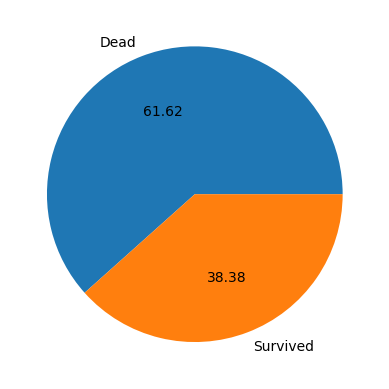

In [83]:
# Plotting survived and not survived bar graph
plt.pie(cleaned_train_data['Survived'].value_counts(), labels= ["Dead", "Survived"], autopct= lambda x: f'{x:.2f}')
plt.show()

> Observation: The dataset is almost balanced and can be proceed with concerning about the precision recall tradeoff

## Feature Engineering

In [85]:
# Converting labeled data into numerical format
label_encoder = LabelEncoder()

cleaned_train_data['Sex'] = label_encoder.fit_transform(cleaned_train_data['Sex'])
cleaned_train_data['Embarked'] = label_encoder.fit_transform(cleaned_train_data['Embarked'])
cleaned_train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,NaN,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


# Model development

## Baseline model